In [1]:
import test_config as cfg
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import os, os.path
import pickle
import io

import skimage
import skimage.io, skimage.transform

import sys
sys.path.append(r'../src/')

In [2]:
import importlib
import transform
importlib.reload(transform)

<module 'transform' from '../src\\transform.py'>

In [3]:
src_fname = os.path.join(cfg.sample_path, os.listdir(cfg.sample_path)[7])
print(src_fname)
src = skimage.io.imread(src_fname, as_grey=True)

D:/Data/bujo_sample\20190309_125153.jpg


C:\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


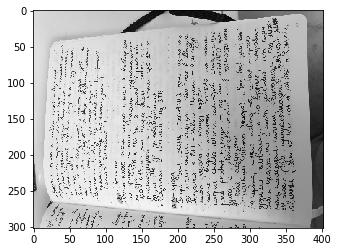

In [4]:
src2 = skimage.transform.rescale(src, scale=0.1)
plt.imshow(src2, cmap='gray')

In [5]:
res = transform.get_text_angle(src2)
print(res[0][0])

C:\Anaconda3\lib\site-packages\skimage\transform\radon_transform.py:69: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


1.1166253101737027


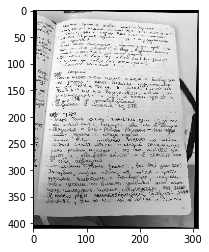

In [9]:
src3 = skimage.transform.rotate(src2, -90.0-res[0][0], resize=True)
plt.imshow(src3, cmap='gray')

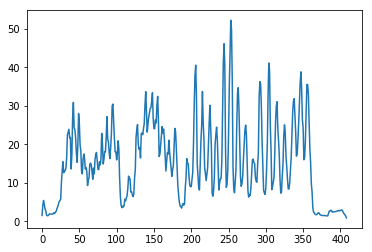

In [12]:
src3v = np.sum(np.abs(src3[:,1:]-src3[:,:-1]), axis=1)
plt.plot(src3v)

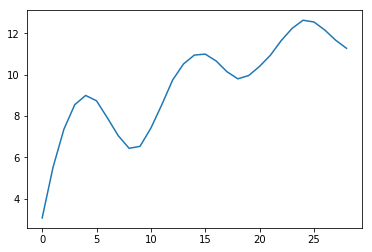

In [15]:
src4 = np.array([np.mean(np.abs(src3v[i:]-src3v[:-i])) for i in range(1, 30)])
plt.plot(src4)

In [18]:
loc_maximas = np.array(range(len(src4)))[np.r_[True, src4[1:] < src4[:-1]] & np.r_[src4[:-1] < src4[1:], True]]
best_freq = min([x for x in loc_maximas if x > 0])
print(best_freq)

8


In [21]:
src5 = src3v - np.median(src3v)
loc_maximas = np.array(range(len(src5)))[np.r_[True, src5[1:] > src5[:-1]] & np.r_[src5[:-1] > src5[1:], True] & (src5 > 0)]
print(loc_maximas)

[ 28  36  38  42  49  56  65  73  77  80  87  95  99 102 128 131 134 139
 148 152 155 161 163 168 170 178 194 206 215 225 234 244 253 263 273 283
 292 304 315 325 338 347 355]


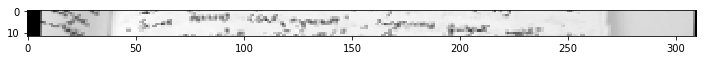

In [26]:
plt.figure(figsize=(12,2))
plt.imshow(src3[60:72,:], cmap='gray')

In [49]:
filter_height = 12
filter_width = 4
h1 = 3
h2 = 8
tmp = src3[60:(60+filter_height)]
tmpd = np.abs(tmp[1:,:]-tmp[:-1,:])
tmp1 = np.mean(tmpd[:h1], axis=0)
tmp2 = np.mean(tmpd[h1:h2], axis=0)
tmp3 = np.mean(tmpd[h2:], axis=0)
tmpr = np.array([(np.median(tmp1[i:(i+filter_width)]), np.median(tmp2[i:(i+filter_width)]), np.median(tmp3[i:(i+filter_width)])) for i in range(len(tmp1)-filter_width)])
tmpf = (tmpr[:,1] / (np.maximum(tmpr[:,0], tmpr[:,1]) + 0.1))

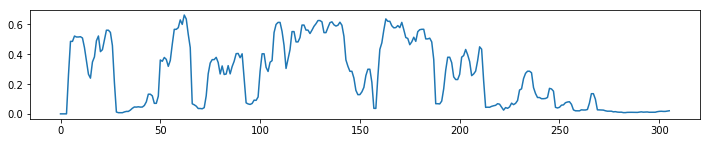

In [50]:
plt.figure(figsize=(12,2))
plt.plot(tmpf)

In [51]:
def calc_haar_feature_v(rows, filter_height=12, filter_width=4, h1=3, h2=8):
    tmpd = np.abs(rows[1:,:]-rows[:-1,:])
    tmp1 = np.mean(tmpd[:h1], axis=0)
    tmp2 = np.mean(tmpd[h1:h2], axis=0)
    tmp3 = np.mean(tmpd[h2:], axis=0)
    tmpr = np.array([(np.median(tmp1[i:(i+filter_width)]), np.median(tmp2[i:(i+filter_width)]), np.median(tmp3[i:(i+filter_width)])) for i in range(len(tmp1)-filter_width)])
    tmpf = (tmpr[:,1] / (np.maximum(tmpr[:,0], tmpr[:,1]) + 0.1))
    return tmpf


In [54]:
%%time
res = [calc_haar_feature(src3[i:(i+12)]) for i in range(len(src3)-12)]

Wall time: 16.9 s


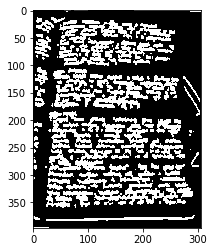

In [60]:
plt.imshow(np.array(res)>0.3, cmap='gray')

array([[0.        , 0.        , 0.        , ..., 0.62154175, 0.62053194,
        0.62024086],
       [0.        , 0.        , 0.        , ..., 0.62184934, 0.62125025,
        0.62110386],
       [0.        , 0.        , 0.        , ..., 0.56303838, 0.56855973,
        0.57434385],
       ...,
       [0.06733178, 0.04975805, 0.03588987, ..., 0.        , 0.        ,
        0.        ],
       [0.31815505, 0.31678654, 0.31491762, ..., 0.        , 0.        ,
        0.        ],
       [0.31389778, 0.31612953, 0.31815377, ..., 0.        , 0.        ,
        0.        ]])